# Exercise 1: Linear Regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import array
from sklearn.linear_model import LinearRegression


**warm_up_exercise**

In [2]:
def warm_up_exercise():
    return(np.identity(5))

In [3]:
warm_up_exercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## **Linear Regression with One Variable**

**Plotting the Data**

In [4]:
data_set_one = np.loadtxt('ex1data1.txt', delimiter=',')
x_values = np.c_[np.ones(data_set_one.shape[0]), data_set_one[:, :1]]
y_values = data_set_one[:, 1:]
x_values.shape

(97, 2)

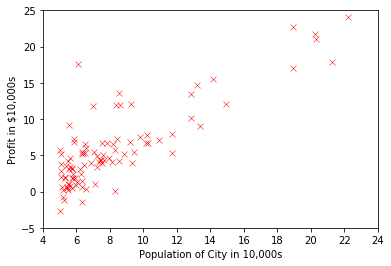

In [5]:
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.xlim(4,24)
plt.ylim(-5,25)
plt.xticks(np.arange(4, 25, 2))
plt.scatter(x_values[:,1], y_values, marker='x', c='red', s=35, linewidth=0.5)
plt.show()

**Gradient Descent**

In [6]:
def compute_cost(x_values, y_values, theta = [[0],[0]]):
    m = len(y_values) # Number of training examples
    J = 0
    h = x_values.dot(theta) # Hypothesis
    J = 1/(2*m) * np.sum(np.square(h - y_values))
    return (J)
compute_cost(x_values, y_values)

32.072733877455676

In [21]:
def gradient_descent(x_values, y_values, theta = [[0],[0]], num_iterations = 1500, alpha=0.01):
    m = len(y_values)
    J_history = np.zeros(num_iterations)
    
    for iteration in range(num_iterations):
        h = x_values.dot(theta)
        theta = theta - (alpha/m) * x_values.T.dot(h - y_values)
        J_history[iteration] = compute_cost(x_values, y_values, theta)
    return(theta, J_history)

Theta_zero:  [-3.63029144]
Theta_one:  [1.16636235]


Text(0,0.5,'Cost J')

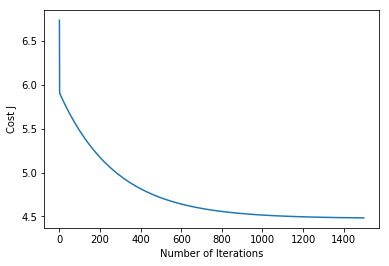

In [22]:
theta, cost_j = gradient_descent(x_values, y_values)
print('Theta_zero: ', theta[0])
print('Theta_one: ', theta[1])

plt.plot(cost_j)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')

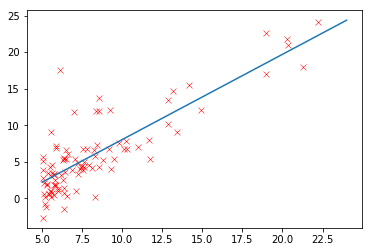

In [25]:
x_range = np.arange(5, 25)
y_range = theta[0] + theta[1]*x_range
plt.scatter(x_values[:,1], y_values, marker='x', c='red', s=35, linewidth=0.5)
plt.plot(x_range, y_range, label='Gradient Descent')
